## Varation with index (and maybe radius)
Does the problem with the index learning have to do with the step size we're using in the data samples. At present it's 1.3 to 1.8 in 100 steps, but maybe that's too coarse? Let's make a picture of the scatter vs index variation, to see how smooth it is...


In [29]:
#simple import block
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
import mie_data_generator_function as mdg

In [30]:
n_index = 100   #100 is what we're using in the training data
n_angles = 100  
lambda_ = 632.8e-9
index = np.linspace(1.3, 1.8, n_index)  #the index
radius  = 8e-6; #set the radius for now at a single value
scatI = np.zeros([n_index,n_angles], dtype = 'float')
#theta = np.zeros([1,n_angles], dtype='float')
theta_start = 0.03
theta_end = 0.22
theta = np.linspace(theta_start, theta_end, n_angles)
#make a Mie data array
for ii in range(index.shape[0]):
    #theta, scatI[ii,:] = mdg.generate_data( index[ii], radius, n_angles)
    scatI[ii,:]= mdg.mie_theta(lambda_, theta.reshape(1,n_angles), radius, 1, index[ii])

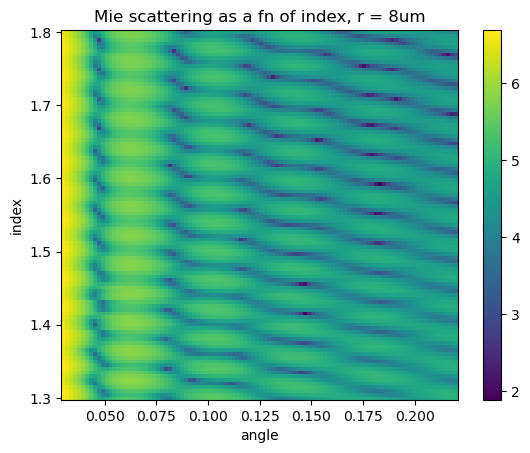

In [31]:
#now let's make a nice color plot of this
plt.figure()
plt.pcolor(theta, index, np.log10(scatI))
plt.xlabel('angle')
plt.ylabel('index')
plt.title('Mie scattering as a fn of index, r = 8um')
plt.colorbar()
plt.show()

So, that looks quite smooth, but let's plot a section to see how the variation is at a particular angle

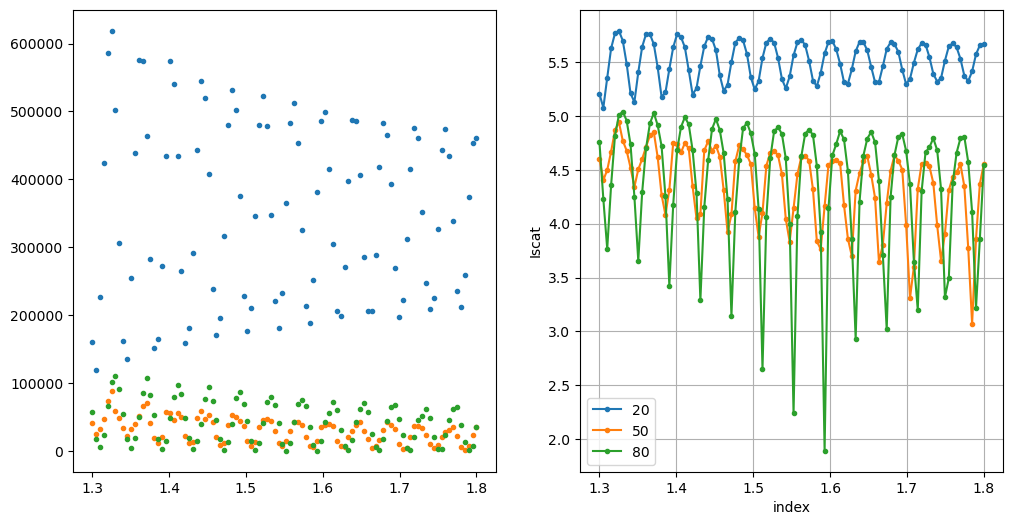

In [32]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
#ax.semilogy(index, scatI[:,20],'-o', label='20')
#ax.semilogy(index, scatI[:,50],'-o', label='50')
#ax.semilogy(index, scatI[:,80],'-o', label='80')
ax[0].plot(index, scatI[:,20],'.', label='20')
ax[0].plot(index, scatI[:,50],'.', label='50')
ax[0].plot(index, scatI[:,80],'.', label='80')
ax[1].plot(index, np.log10(scatI[:,20]),'.-', label='20')
ax[1].plot(index, np.log10(scatI[:,50]),'.-', label='50')
ax[1].plot(index, np.log10(scatI[:,80]),'.-', label='80')
plt.xlabel('index')
plt.ylabel('Iscat')
plt.legend()
plt.grid()
plt.show()

https://sotonac.sharepoint.com/teams/Phaseretrievalwithneuralnets/_layouts/OneNote.aspx?id=%2Fteams%2FPhaseretrievalwithneuralnets%2FShared%20Documents%2Fnanoparticle%20Mie%20scattering%20project%2Fnano%20Mie%20scattering%20project&wd=target%28NN%20models.one%7C9DEBDA63-8233-48F7-9E9A-7EF1E07855D7%2FVariability%20of%20scatter%20with%20index%7C735C2D17-0D7F-B34E-A2E0-42B9ED5C3174%2F%29
onenote:https://sotonac.sharepoint.com/teams/Phaseretrievalwithneuralnets/Shared%20Documents/nanoparticle%20Mie%20scattering%20project/nano%20Mie%20scattering%20project/NN%20models.one#Variability%20of%20scatter%20with%20index&section-id={9DEBDA63-8233-48F7-9E9A-7EF1E07855D7}&page-id={735C2D17-0D7F-B34E-A2E0-42B9ED5C3174}&end